# **Exercise sheet 4**
Group 1: Chiara Lesa, Galvin Alexander Hoang, Anna Novikova
## **Exercise 1**
Write a Euler-scheme for the equation:

$$dXt=−(σ(X_t)^2+γ(X_t)^2)/2dt+σ(X_t)dW^1_t+γ(X_t)dW^2_t, \space   X_0=5.$$
 
where  $σ(x):=\sqrt{|x|}$ and $ γ(x)=1 $.

Plot simulations for  $S_t=exp(X_t)$  on the time interval $ [0,T] $ with $ T=2 $ and $ N $ time-steps.


What happens if $ N= 10, 1000, 100000 $?

What changes if you use $ γ=0 $,  $σ(x)=\sqrt{1+|x|}$ instead? 

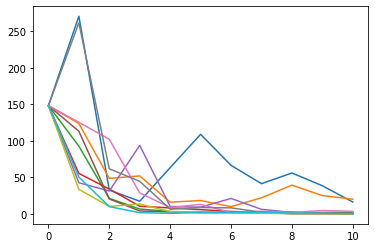

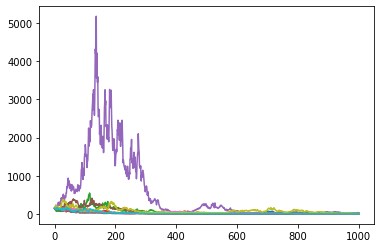

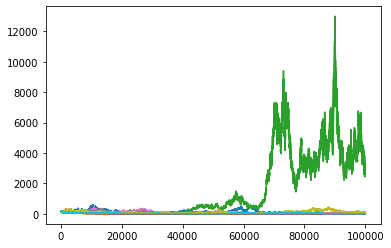

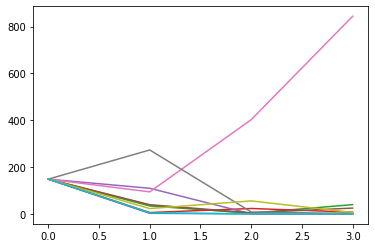

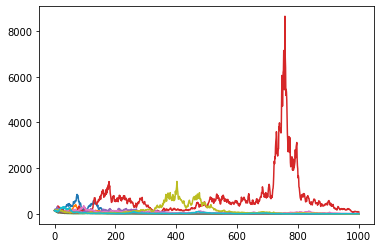

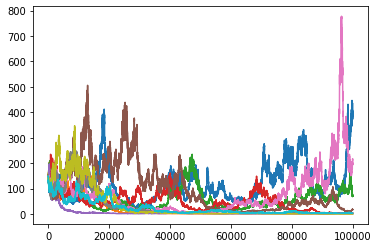

In [ ]:
#Part 1
import numpy as np
import matplotlib.pyplot as plt
import sys

X0 = 5
S0 = np.exp(5) # initial value of the asset
T = 2.0  #maturity
gamma = 1
R = 10 # number of Trajectories

## Normalising initial value to of S0 to 1 (1 unit of money = price of S0)

#see slide 9  lecture 4
#P - dynamics
def path(S0,gamma,N,T,R):
    dt = T/N
    X = np.zeros((N+1,R)) + np.log(S0)
    for j in range(N):
        dZ1 = np.random.normal(0,1,R)
        dZ2 = np.random.normal(0,1,R)
        sigma = np.sqrt(np.abs(X[j,:]))
        increment = -dt*(sigma**2 + gamma**2)/2+ sigma*dZ1*np.sqrt(dt) + gamma*dZ2*np.sqrt(dt)
        X[j+1,:] = X[j,:] + increment
    return np.exp(X)



S1 = path(S0,1 ,10 , 2.0 , R)
for i in range(R):
   plt.plot(S1[:,i])
plt.show()

S2 = path(S0,1, 1000, 2.0 , R)
for i in range(R):
   plt.plot(S2[:,i])
plt.show()

S3 = path(S0,1, 100000,2.0,R)
for i in range(R):
   plt.plot(S3[:,i])
plt.show()

#part 2
def path2(S0,gamma,N,T,R):
    dt = T/N
    X = np.zeros((N+1,R)) + np.log(S0)
    for j in range(N):
        dZ1 = np.random.normal(0,1,R)
        dZ2 = np.random.normal(0,1,R)
        sigma = np.sqrt(1 + np.abs( X[j,:]))
        increment = -dt*(sigma**2 + gamma**2)/2+ sigma*dZ1*np.sqrt(dt) + gamma*dZ2*np.sqrt(dt)
        X[j+1,:] = X[j,:] + increment
    return np.exp(X)

S4 = path2(S0,0 ,3 , 2.0 , R)
for i in range(R):
   plt.plot(S4[:,i])
plt.show()

S5 = path2(S0,0,1000, 2.0 , R)
for i in range(R):
   plt.plot(S5[:,i])
plt.show()

S6 = path2(S0,0,100000,2.0,R)
for i in range(R):
   plt.plot(S6[:,i])
plt.show()



#**Exercise 2:**
Use the above model as a  Q -model with  $N=8 ,  σ(x)=2 ,  γ(x)=0 $ and explicit noise term:  $dW^j_t=Z \sqrt{dt} $ where  $P(Z=1)=1/2 $,  $P(Z=−1)=1/2 .$

Use 'MC-algorithm' or 'full exhauste of all possible values  Z  can achieve' to obtain the (approximate) price of the European call with strike $ K=50 $, i.e. of
$$f_T=(S_T−50)^+$$
 
MC-algorithm:  $E[f_T]≈1/N ∑^N_{k=1} f^k_T $ where $ f^1_T,…,f^N_T $ are samples for  $f_T $.

Full exhauste: Find the probabilities for the  $2N$ -possible values for the  $N $-copies of $ Z$  which are required per simulation and calculate: 
$$E[f_T] = ∑ _{k=1}^{2^N}P(scenario_k)f_T(scenario_k)$$

In [ ]:
import numpy as np
from itertools import product

X0 = 5
sigma = 2
gamma = 0
N = 8
T = 2
R = 100000
K = 50

def dXT(X0, sigma, gamma, N, T, R):
    dt = T/N
    Xinc = np.empty((N + 1, R))
    Xinc[0,:] = X0
    z = np.random.choice([-1, 1], p = [0.5, 0.5], size = (N, R))
    dW1 = z*np.sqrt(dt)
    dW2 = z*np.sqrt(dt)
    inc = -(sigma**2 + gamma**2)/2*dt + sigma*dW1 + gamma*dW2
    Xinc[1:N+1,:] = inc
    X = np.cumsum(Xinc, 0)
    return X[N,:]

ST = np.exp(dXT(X0, sigma, gamma, N, T, R))
CT = np.maximum(ST - K, 0)
callMC = np.mean(CT)
callMC

73.46809159985213

In [ ]:
def fullEx(X0, sigma, gamma, N, T, R):
    dt = T/N
    Xinc = np.empty((N + 1, 2**N))
    Xinc[0,:] = X0
    z = np.transpose(np.array(list(product([-1, 1], repeat = N))))
    dW1 = z*np.sqrt(dt)
    dW2 = z*np.sqrt(dt)
    inc = -(sigma**2 + gamma**2)/2*dt + sigma*dW1 + gamma*dW2
    Xinc[1:N+1,:] = inc
    X = np.cumsum(Xinc, 0)
    return X[N,:]

ST = np.exp(fullEx(X0, sigma, gamma, N, T, R))
CT = np.maximum(ST - K, 0)
callFullEx = np.mean(CT)
callFullEx

74.92858456982498